In [5]:
import pandas as pd
import numpy as np

In [1]:
f2015 = "/content/drive/MyDrive/기쁨코인/dataset/최종 table/TABLE_2015.csv"
f2016 = "/content/drive/MyDrive/기쁨코인/dataset/최종 table/TABLE_2016.csv"
f2017 = "/content/drive/MyDrive/기쁨코인/dataset/최종 table/TABLE_2017.csv"

In [143]:
data1 = pd.read_csv(f2015, index_col=0)
data2 = pd.read_csv(f2016, index_col=0)
data3 = pd.read_csv(f2017, index_col=0)
data=pd.concat([data1, data2], axis=0)
data=pd.concat([data, data3], axis=0)

In [144]:
#size 피처 평수만 가져오기
data['size']=data['size'].str.split(' ').str[1]
data['size']=data['size'].str.split('㎡').str[0]
data= data.astype({'size':'float'})
data=data.dropna()

#1km변수만 가져옴
data_1=data.filter(regex='_1')

#앞의 변수중 필요한 변수 select
list_fo= [0, 5, 8]
data_2= data.iloc[:, list_fo]

#뒤의 변수중 다중공선성 작은 변수 select
list_gu=[ 86, 87, 90, 93, 97, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134]
data_3=data.iloc[:, list_gu]
all=pd.concat([data_2, data_1], axis=1)
all=pd.concat([all, data_3], axis=1)

In [145]:
all.head()

,building t,size,success,일반게임제공업_1km,골프연습장업_1km,공연장_1km,단란주점_1km,노래연습장_1km,당구장_1km,숙박업_1km,...,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,사업서비스업,공공행정국방및사회보장행정,교육서비스업,보건업 및 사회복지 서비스업,문화 및 기타서비스업,순생산물세
0,오피스텔,38.71,1.911000e+08,5,65,2,46,74,82,33,...,1591091,6968728,2583780,8593940,12316944,275093,1588177,2419185,1586264,5429338
1,종교시설,797.09,3.133300e+09,1,6,0,1,4,6,0,...,1591091,6968728,2583780,8593940,12316944,275093,1588177,2419185,1586264,5429338
2,근린상가,129.21,7.017000e+08,1,42,6,82,27,60,11,...,1591091,6968728,2583780,8593940,12316944,275093,1588177,2419185,1586264,5429338
3,근린상가,86.45,9.950000e+08,9,62,9,83,120,125,55,...,1591091,6968728,2583780,8593940,12316944,275093,1588177,2419185,1586264,5429338
4,근린시설,1369.19,9.311000e+09,1,27,1,20,14,19,7,...,1591091,6968728,2583780,8593940,12316944,275093,1588177,2419185,1586264,5429338


In [146]:
y_data= all['success']
all=all.drop('success', axis=1)

In [147]:
all = all.drop('building t', axis=1)

In [148]:
y_data.describe()['min']

1770000.0

In [149]:
y_data

0      1.911000e+08
1      3.133300e+09
2      7.017000e+08
3      9.950000e+08
4      9.311000e+09
           ...     
761    1.670000e+08
762    1.510000e+07
763    1.610000e+07
764    1.664000e+07
765    1.939000e+07
Name: success, Length: 2799, dtype: float64

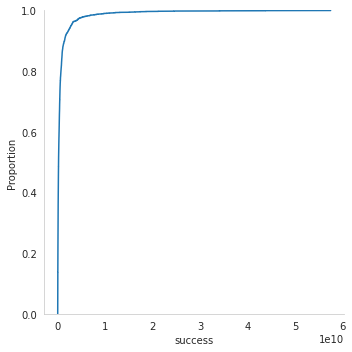

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(y_data, kind="ecdf")

In [188]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = all.values # 독립변인들의 value값만 추출
y = y_data # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = list(all.columns)
pd.DataFrame(x, columns=features).head()

,size,일반게임제공업_1km,골프연습장업_1km,공연장_1km,단란주점_1km,노래연습장_1km,당구장_1km,숙박업_1km,유흥주점영업_1km,음식점_1km,...,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,사업서비스업,공공행정국방및사회보장행정,교육서비스업,보건업 및 사회복지 서비스업,문화 및 기타서비스업,순생산물세
0,-0.196728,-0.683892,3.339998,-0.457392,0.558382,0.363631,1.341593,-0.284315,0.740648,1.390916,...,2.828359,2.013212,-0.013963,3.449641,3.085798,-0.400014,2.498736,3.179847,2.662893,2.345668
1,0.700322,-0.940800,-1.031302,-0.544082,-1.349107,-1.499844,-1.578077,-0.978308,-0.721945,-1.493539,...,2.828359,2.013212,-0.013963,3.449641,3.085798,-0.400014,2.498736,3.179847,2.662893,2.345668
2,-0.089680,-0.940800,1.635932,-0.284012,2.084374,-0.887559,0.496425,-0.746977,-0.098192,1.383650,...,2.828359,2.013212,-0.013963,3.449641,3.085798,-0.400014,2.498736,3.179847,2.662893,2.345668
3,-0.140258,-0.426985,3.117728,-0.153976,2.126763,1.588200,2.993511,0.178346,2.353803,2.841136,...,2.828359,2.013212,-0.013963,3.449641,3.085798,-0.400014,2.498736,3.179847,2.662893,2.345668
4,1.377031,-0.940800,0.524585,-0.500737,-0.543723,-1.233633,-1.078660,-0.831097,-0.377805,-0.399335,...,2.828359,2.013212,-0.013963,3.449641,3.085798,-0.400014,2.498736,3.179847,2.662893,2.345668


In [152]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
# 주성분으로 이루어진 데이터 프레임 구성

In [153]:
pca.explained_variance_ratio_

array([0.34959808, 0.18842834, 0.09854356, 0.05783448])

In [154]:
sum(pca.explained_variance_ratio_)

0.6944044576239127

In [155]:
0.69440 - 0.0578

0.6366

In [156]:
0.34959808 + 0.18842834

0.53802642

In [189]:
pca1 = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca1.fit_transform(x)
principalDf1 = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [190]:
principalDf1

,pc1,pc2
0,9.952023,-5.668132
1,5.976105,-7.456619
2,9.844106,-6.042291
3,12.156121,-4.174703
4,7.853794,-7.138468
...,...,...
2794,-1.763978,1.488054
2795,-1.814056,1.419601
2796,-1.814056,1.419601
2797,-3.622049,-0.837520


In [191]:
y_data = y.reset_index(drop=True)

y_data

0       1.911000e+08
1       3.133300e+09
2       7.017000e+08
3       9.950000e+08
4       9.311000e+09
            ...     
2794    1.670000e+08
2795    1.510000e+07
2796    1.610000e+07
2797    1.664000e+07
2798    1.939000e+07
Name: success, Length: 2799, dtype: float64

In [192]:
principalDf1 = pd.concat([principalDf1, y_data], axis=1)

In [193]:
principalDf1

,pc1,pc2,success
0,9.952023,-5.668132,1.911000e+08
1,5.976105,-7.456619,3.133300e+09
2,9.844106,-6.042291,7.017000e+08
3,12.156121,-4.174703,9.950000e+08
4,7.853794,-7.138468,9.311000e+09
...,...,...,...
2794,-1.763978,1.488054,1.670000e+08
2795,-1.814056,1.419601,1.510000e+07
2796,-1.814056,1.419601,1.610000e+07
2797,-3.622049,-0.837520,1.664000e+07


In [194]:
principalDf1 = principalDf1.loc[principalDf1['success']<0.5e9]

In [195]:
principalDf1

,pc1,pc2,success
0,9.952023,-5.668132,191100000.0
7,8.992312,-5.923826,150211000.0
10,10.089087,-5.487742,191577000.0
16,10.668070,-5.601090,487590000.0
20,10.397451,-5.304967,22196000.0
...,...,...,...
2794,-1.763978,1.488054,167000000.0
2795,-1.814056,1.419601,15100000.0
2796,-1.814056,1.419601,16100000.0
2797,-3.622049,-0.837520,16640000.0


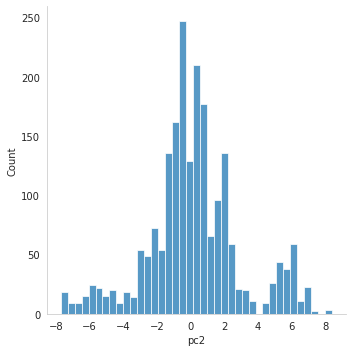

In [196]:
sns.displot(principalDf1['pc2'])

In [197]:
principalDf1.describe()

,pc1,pc2,success
count,2087.000000,2087.000000,2.087000e+03
mean,-0.264877,0.177758,1.512416e+08
std,3.698931,2.781253,1.367283e+08
min,-5.022255,-7.708409,1.770000e+06
25%,-2.702101,-1.129034,3.799995e+07
50%,-1.890450,0.056006,1.033000e+08
75%,1.336329,1.519889,2.355955e+08
max,12.143983,8.401640,4.999000e+08


LinAlgError: ignored

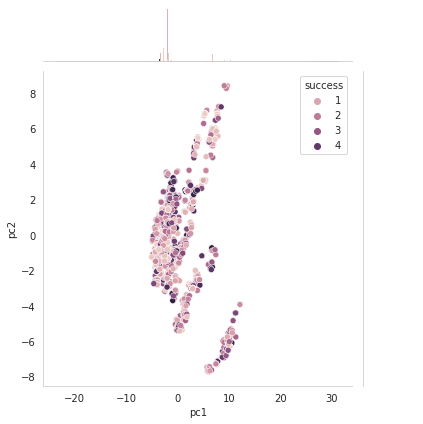

In [198]:
sns.jointplot(data=principalDf1, x="pc1", y="pc2", hue="success")

In [133]:
pca = PCA(n_components=3) # 주성분을 몇개로 할지 결정
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns = ['pc1', 'pc2', 'pc3'])
# 주성분으로 이루어진 데이터 프레임 구성

In [134]:
principalDf = pd.concat([principalDf, y], axis=1)

In [135]:
principalDf

,pc1,pc2,pc3,success
0,9.952023,-5.668132,-1.777928,1.911000e+08
1,5.976105,-7.456619,4.909105,3.133300e+09
2,9.844106,-6.042291,-1.497413,7.017000e+08
3,12.156121,-4.174703,-5.471965,9.950000e+08
4,7.853794,-7.138468,1.565031,9.311000e+09
...,...,...,...,...
2794,-1.763978,1.488054,-3.192289,1.670000e+08
2795,-1.814056,1.419601,-3.170993,1.510000e+07
2796,-1.814056,1.419601,-3.170993,1.610000e+07
2797,-3.622049,-0.837520,0.289102,1.664000e+07


In [139]:
principalDf = principalDf.loc[principalDf['success']<0.5e9]

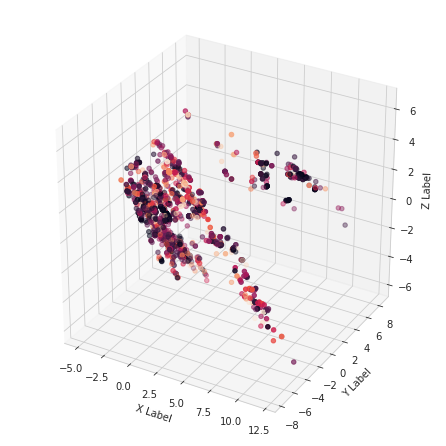

In [140]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = list(principalDf['pc1'])
y = list(principalDf['pc2'])
z = list(principalDf['pc3'])

ce = principalDf['success']

ax.scatter(x, y, z, c=ce, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()